In [61]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from src.feature_engineering import (
    apply_feature_engineering,
    drop_all_zero_entries,
    choose_acc_ids,
)
import yaml

In [62]:
acc_config_path = Path("../config/acc_config.yaml")
with open(acc_config_path, "r") as yaml_file:
    acc_config = yaml.safe_load(yaml_file)

## Choose Account to have a look at

In [63]:
CATEGORY = "Investitionsausgaben"

In [64]:
# Replace with your actual data loading code
file_path = Path("../data/final/merged_complete.csv")
df = pd.read_csv(file_path, index_col=None, header=0)

# Convert 'Year' to a relative year
# df["Year"] = df["Year"] - df["Year"].min()

# Sort dataframe and apply feature engineering
df = df.sort_values(by="Year")
df = apply_feature_engineering(df)
df = drop_all_zero_entries(df)
df = choose_acc_ids(df, acc_config.get(CATEGORY)) # Choose your account
df = df.drop_duplicates(subset=['Year', 'Region', 'Acc-ID'], keep='first')


In [65]:
# Calculate the percentage difference and handle division by zero
df['Percentage Difference'] = ((df['Budget y'] - df['Realized']) / df['Realized']).replace([np.inf, -np.inf], np.nan) * 100

In [66]:
# Clip the percentage difference to the 1% and 99% quantile
low_quantile = df['Percentage Difference'].quantile(0.01)
high_quantile = df['Percentage Difference'].quantile(0.99)

df = df[(df['Percentage Difference'] >= low_quantile) & (df['Percentage Difference'] <= high_quantile)]

In [67]:
df.tail()

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack,Alter 0–19,Alter 20–64,Alter 65 und mehr,...,"BWS Transport, IT-Dienstleistung",BWS Finanzdienstleistungen und Versicherungen,BWS Wissenschaft und Kunst sowie sonstige Dienstleistungen,BWS Öffentliche Verwaltung,BWS Private Haushalte als Hersteller,BIP,Realized_1yr_lag,Realized_2yr_lag,Budget_Realized_Interaction,Percentage Difference
10083,2022.0,GL,50.0,19472.0,22260.0,24815.0,2788.0,7968,24758,8745,...,540.942945,236.57292,408.400626,227.506679,11.1406,2965.323133,17327.4,19498.9,429979431.0,14.317995
10085,2022.0,GL,52.0,1064.3,1783.0,2212.0,718.7,7968,24758,8745,...,540.942945,236.57292,408.400626,227.506679,11.1406,2965.323133,1562.1,1185.6,3455365.2,67.527953
10086,2022.0,GL,54.0,815.9,1990.0,1940.0,1174.1,7968,24758,8745,...,540.942945,236.57292,408.400626,227.506679,11.1406,2965.323133,3093.4,1589.1,6001196.0,143.902439
10088,2022.0,GL,56.0,13530.7,14821.0,15099.0,1290.3,7968,24758,8745,...,540.942945,236.57292,408.400626,227.506679,11.1406,2965.323133,22447.5,14377.3,338934802.5,9.536092
10089,2022.0,GL,57.0,8066.4,12027.0,17635.0,3960.6,7968,24758,8745,...,540.942945,236.57292,408.400626,227.506679,11.1406,2965.323133,7843.3,4169.7,138316595.5,49.099970


In [68]:
df.describe()

,Year,Acc-ID,Realized,Budget y,Budget y+1,Slack,Alter 0–19,Alter 20–64,Alter 65 und mehr,Geschlecht Mann,...,"BWS Transport, IT-Dienstleistung",BWS Finanzdienstleistungen und Versicherungen,BWS Wissenschaft und Kunst sowie sonstige Dienstleistungen,BWS Öffentliche Verwaltung,BWS Private Haushalte als Hersteller,BIP,Realized_1yr_lag,Realized_2yr_lag,Budget_Realized_Interaction,Percentage Difference
count,1491.000000,1491.000000,1491.000000,1.491000e+03,1.491000e+03,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,...,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1358.000000,1238.000000,1.358000e+03,1491.000000
mean,2016.894031,54.041583,47950.053039,5.356938e+04,5.294582e+04,7525.333820,67413.167002,207911.573441,61586.925553,166936.236754,...,6807.628143,2912.537221,5283.568886,2872.084692,87.788056,28002.033423,44799.150966,45499.237595,1.287572e+10,34.911647
std,3.317359,2.646692,101851.715879,1.135095e+05,1.148144e+05,31478.637553,73439.921559,230284.737630,65528.318351,182385.833655,...,8971.235640,6467.308465,6660.554358,4114.577399,96.340933,34093.340217,100726.754373,99688.991229,6.683210e+10,185.433842
min,2011.000000,50.000000,-19.788250,0.000000e+00,-1.500000e+03,-306912.816000,3392.000000,9314.000000,2680.000000,8053.000000,...,212.663920,50.159750,131.943850,70.569930,3.828920,905.454290,-89.798220,-89.798220,0.000000e+00,-100.000000
25%,2014.000000,52.000000,2569.150000,1.659000e+03,1.290000e+03,0.000000,11355.000000,33436.000000,11528.500000,28053.500000,...,669.137712,194.195830,629.551060,310.389276,15.218680,3531.350434,1276.825000,1311.533333,5.380870e+05,-12.365556
50%,2017.000000,54.000000,10433.763420,1.142810e+04,1.051500e+04,876.200000,37939.000000,122872.000000,41350.000000,99707.000000,...,4125.436590,854.790650,3238.227000,1434.247584,54.422228,18140.596360,8933.830695,9106.188000,5.990589e+07,13.365265
75%,2020.000000,56.000000,42149.900000,4.516410e+04,4.466032e+04,7110.700000,83814.000000,255571.000000,78899.000000,205976.000000,...,8109.031830,2411.234780,6086.726600,2405.888556,109.604720,36125.953350,35080.846835,36676.875000,1.219435e+09,43.152989
max,2022.000000,58.000000,994966.000000,1.086300e+06,1.086300e+06,322376.530390,312392.000000,994624.000000,272951.000000,788846.000000,...,41738.645750,31105.560390,33656.891820,16406.140760,434.331740,156947.128742,994966.000000,994966.000000,9.625053e+11,2295.672007


In [69]:
highest_dev = df.sort_values(by='Percentage Difference', ascending=False).head(10)
highest_dev

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack,Alter 0–19,Alter 20–64,Alter 65 und mehr,...,"BWS Transport, IT-Dienstleistung",BWS Finanzdienstleistungen und Versicherungen,BWS Wissenschaft und Kunst sowie sonstige Dienstleistungen,BWS Öffentliche Verwaltung,BWS Private Haushalte als Hersteller,BIP,Realized_1yr_lag,Realized_2yr_lag,Budget_Realized_Interaction,Percentage Difference
3111,2020.0,GE,55.0,709.61300,17000.0,17000.0,16290.38700,106488,316942,82913,...,14461.93919,7224.96367,10004.20763,6282.17194,123.36414,52015.88663,8185.321,12781.44320,1.391505e+08,2295.672007
3390,2020.0,OW,54.0,75.30000,1650.0,1150.0,1574.70000,7589,23034,7485,...,420.25830,108.39075,487.15234,184.78269,9.28316,2579.31542,78.800,111.90000,9.062000e+04,2091.235060
8519,2013.0,BL,54.0,1753.30000,38000.0,13750.0,36246.70000,54044,166891,57721,...,5396.02381,994.61935,4078.42172,1447.69453,67.49614,19331.32150,3690.000,NaN,5.073750e+07,2067.341584
263,2021.0,FR,55.0,850.00000,15600.0,10600.0,14750.00000,72292,203367,54150,...,4119.72537,1037.89652,3636.83066,2392.01671,83.72715,20251.55568,1500.000,5844.60000,1.590000e+07,1735.294118
222,2021.0,BS,54.0,5379.65935,95710.0,75857.0,90330.34065,34337,122872,38827,...,5534.13126,3307.27858,5972.43582,2383.00268,50.18365,40076.44716,16223.380,33357.59718,1.230657e+09,1679.108932
6767,2016.0,OW,54.0,74.00000,1300.0,2800.0,1226.00000,7639,23026,6713,...,445.99782,97.58834,439.31673,179.53384,10.02569,2476.05830,652.000,125.00000,1.825600e+06,1656.756757
4602,2015.0,NE,54.0,472.00000,8085.0,7350.0,7613.00000,38117,107066,32924,...,2174.08672,490.12363,2485.88808,1514.33660,46.45897,15463.35493,2072.000,NaN,1.522920e+07,1612.923729
8343,2013.0,GL,54.0,9.20000,150.0,575.0,140.80000,7799,24514,7280,...,504.51047,147.73046,343.23295,198.92320,9.59960,2680.91856,10.000,0.00000,5.750000e+03,1530.434783
4391,2015.0,SG,54.0,6544.70000,101152.0,35699.0,94607.30000,103693,308228,87144,...,8082.90956,2621.30335,6187.23537,2885.41924,130.04247,36676.13352,291288.000,0.00000,1.039869e+10,1445.555946
5876,2012.0,UR,54.0,1064.20000,15582.7,15958.0,14518.50000,7512,21512,6669,...,263.01559,80.27031,283.38879,220.06235,8.86603,1799.17625,1063.000,NaN,1.696335e+07,1364.264236


## Aggregated Relative Difference

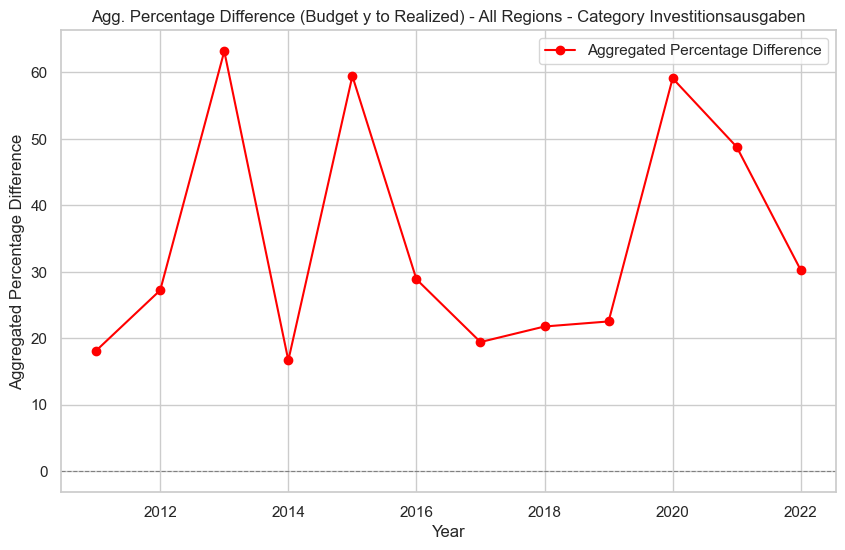

In [70]:
aggregated_data = df.groupby('Year')['Percentage Difference'].mean()

plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data, marker='o', linestyle='-', color='red', label='Aggregated Percentage Difference')
plt.title(f'Agg. Percentage Difference (Budget y to Realized) - All Regions - Category {CATEGORY}')
plt.xlabel('Year')
plt.ylabel('Aggregated Percentage Difference')
plt.axhline(0, color='grey', lw=0.8, ls='--')  # Add a line at 0% difference for reference
plt.legend()
plt.show()


## Relative Difference per Region

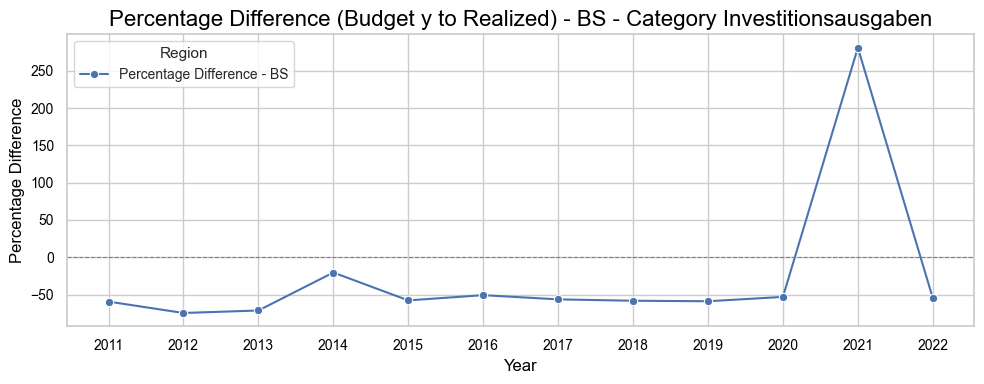

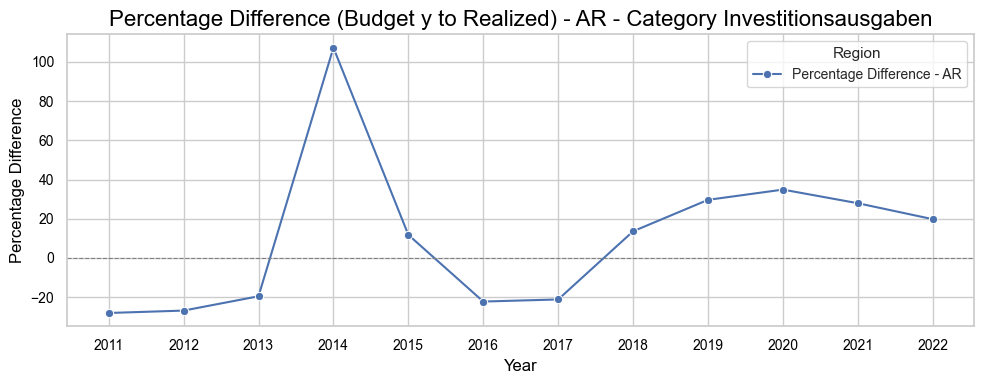

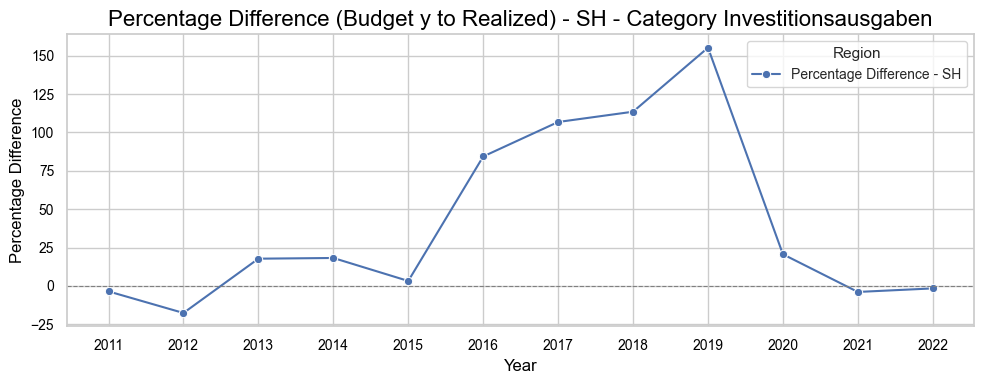

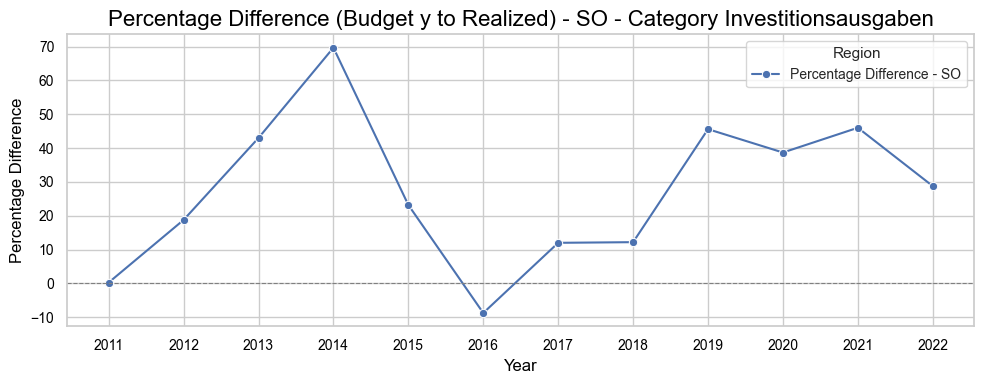

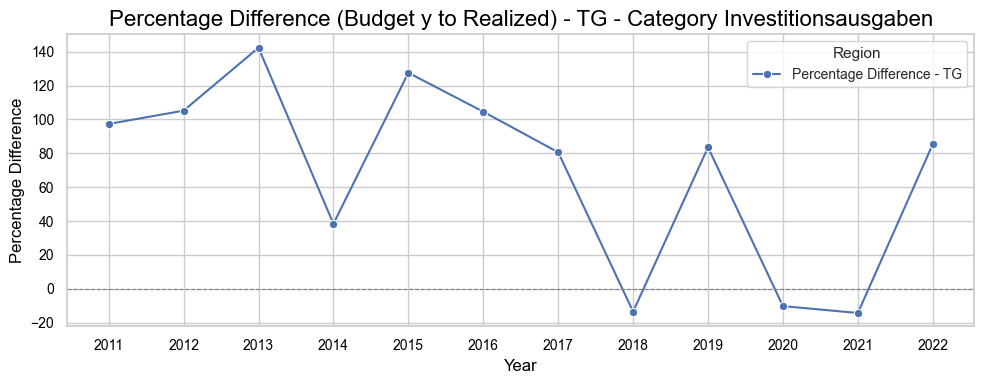

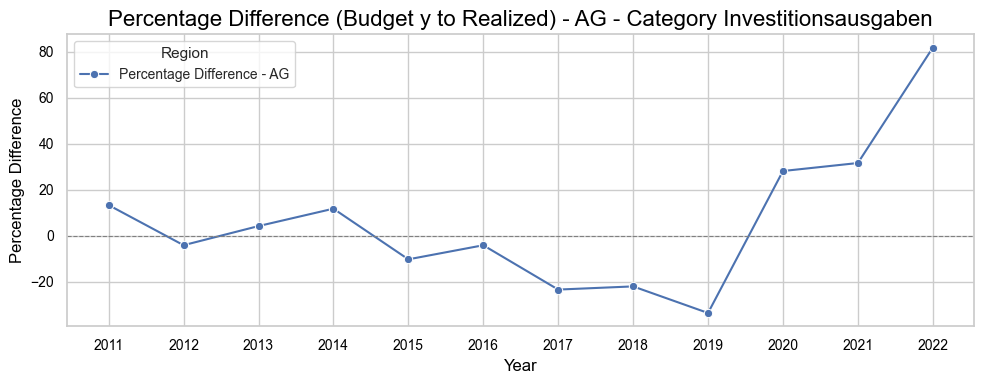

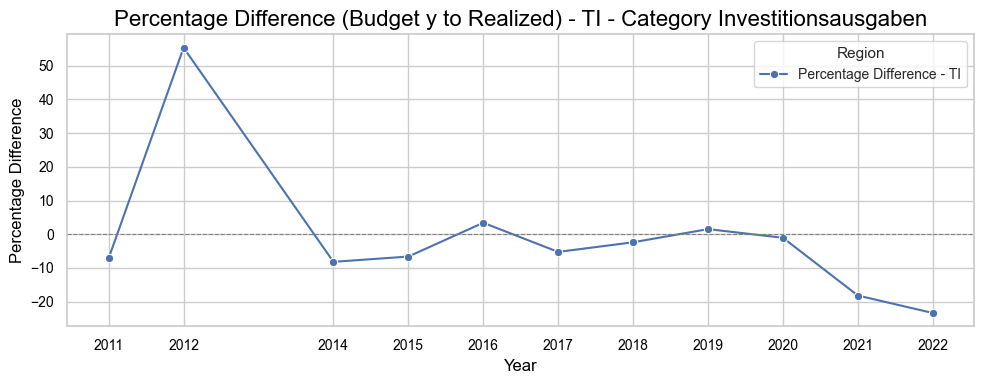

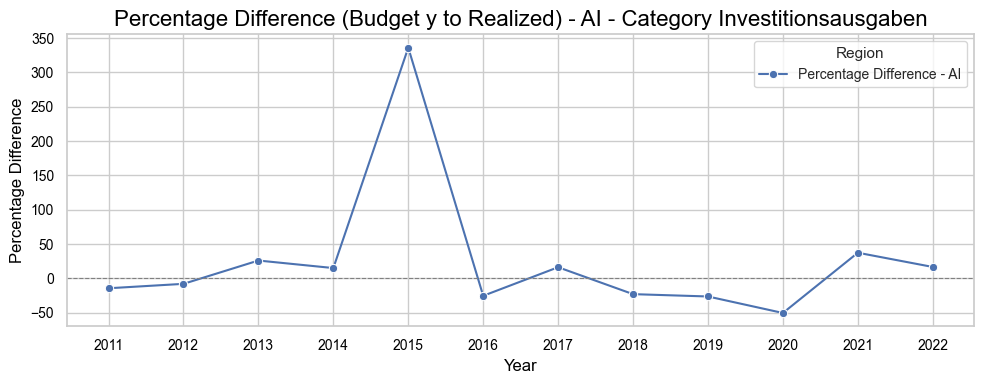

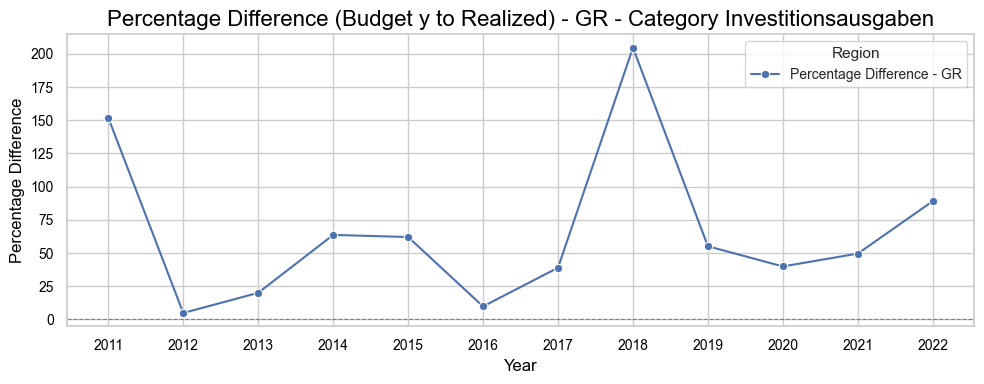

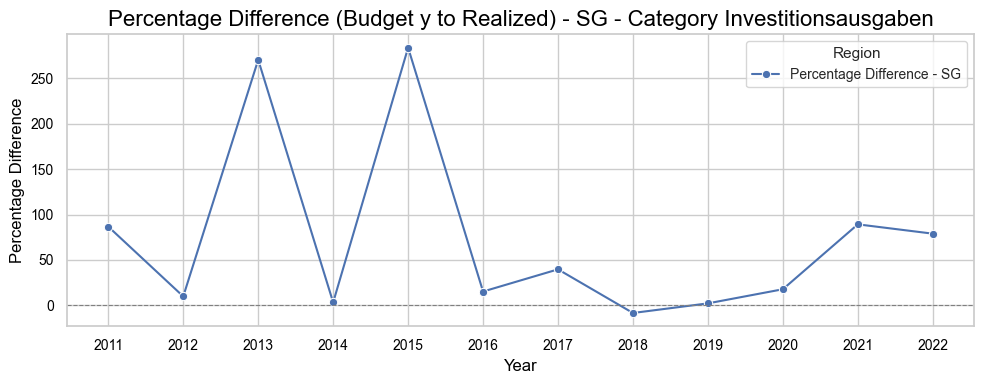

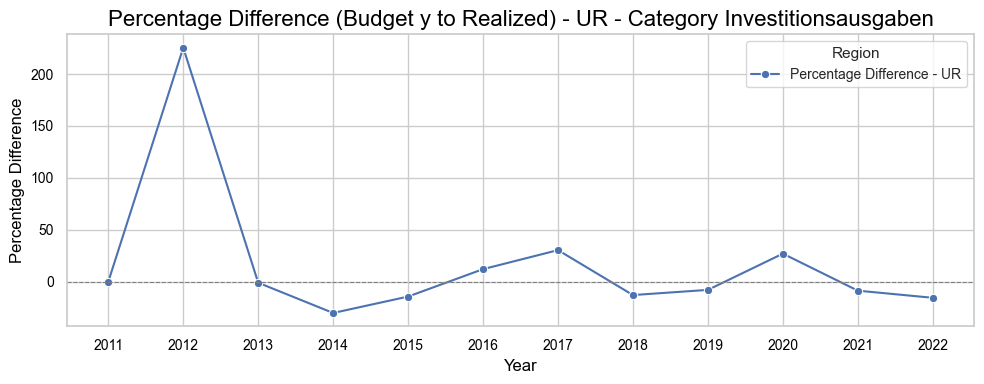

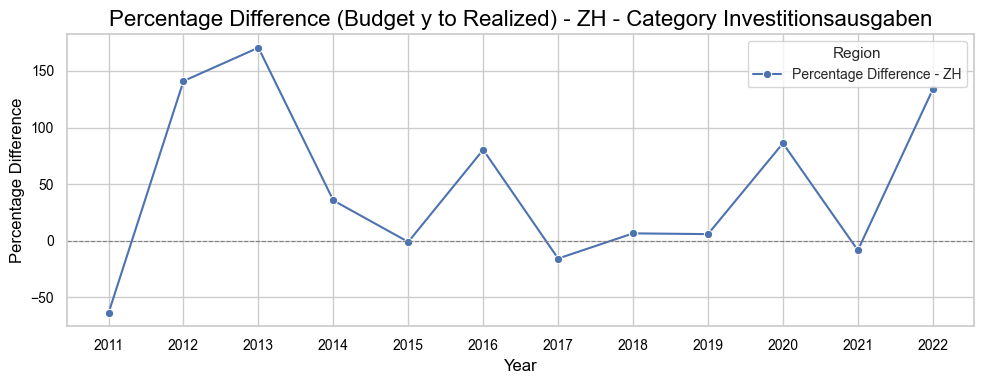

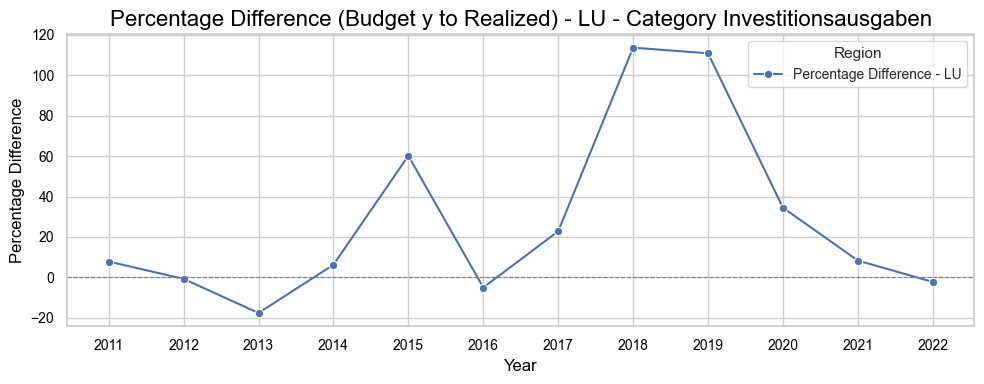

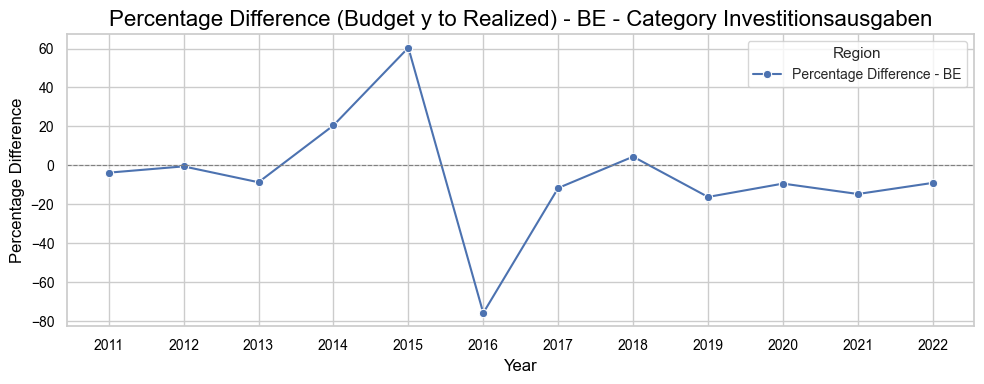

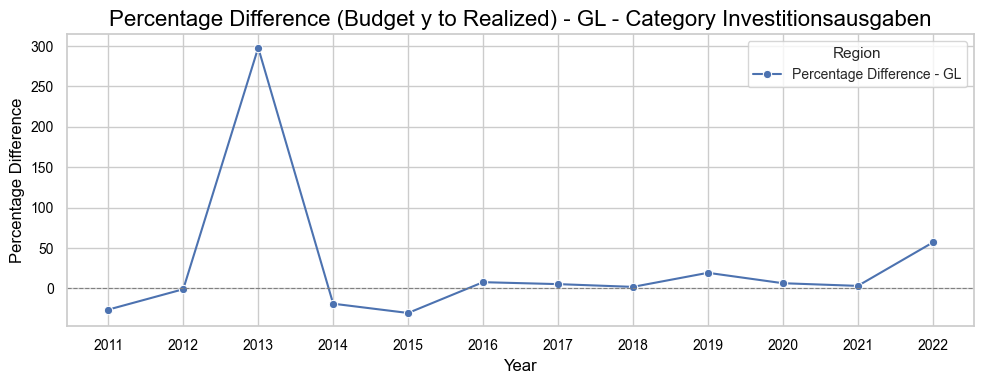

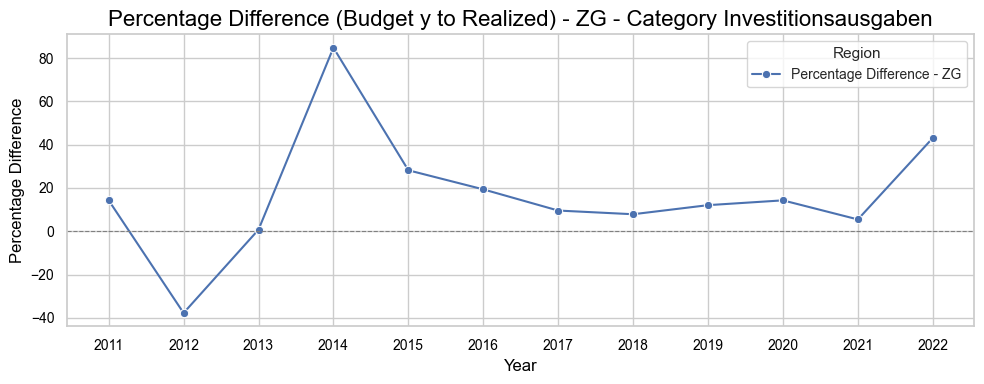

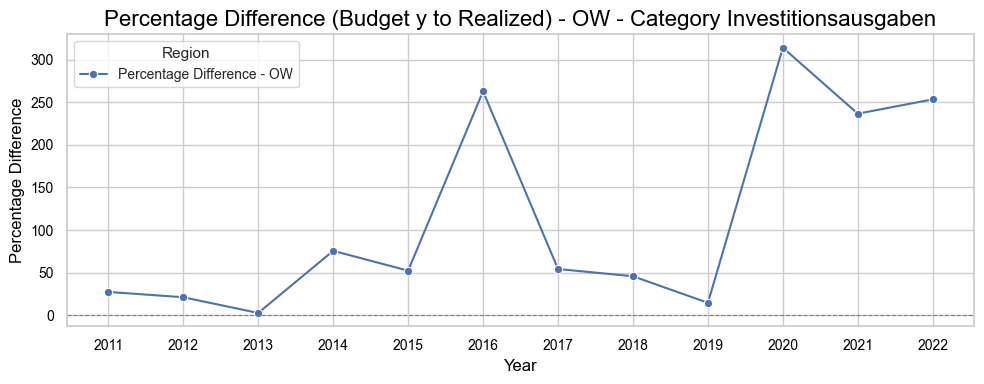

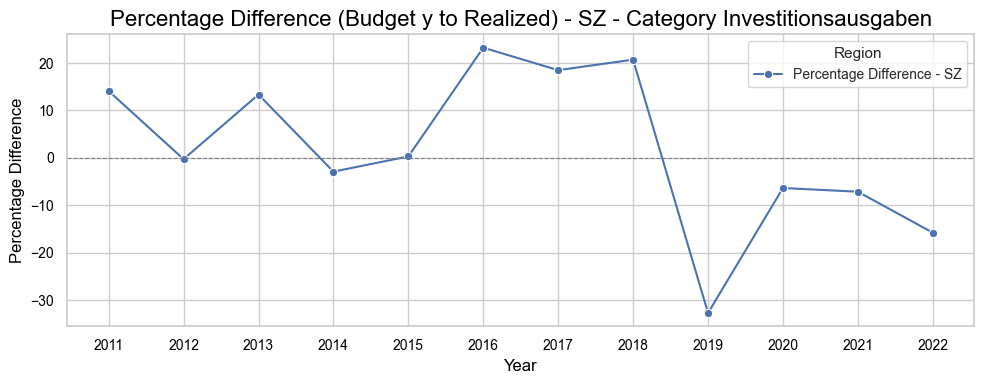

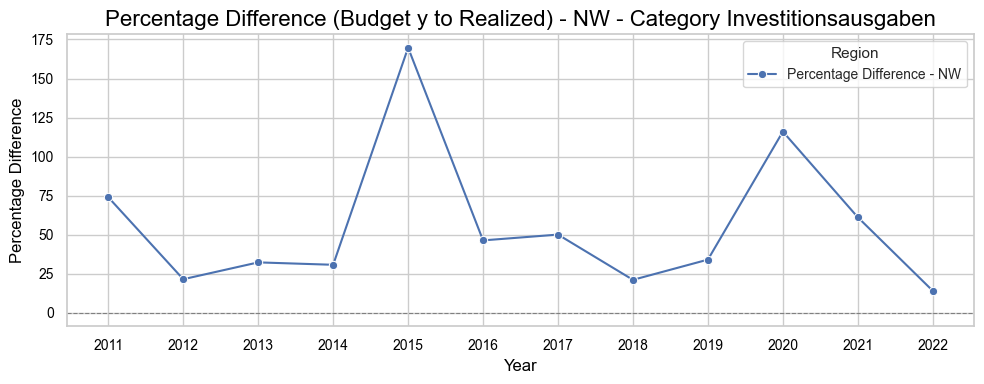

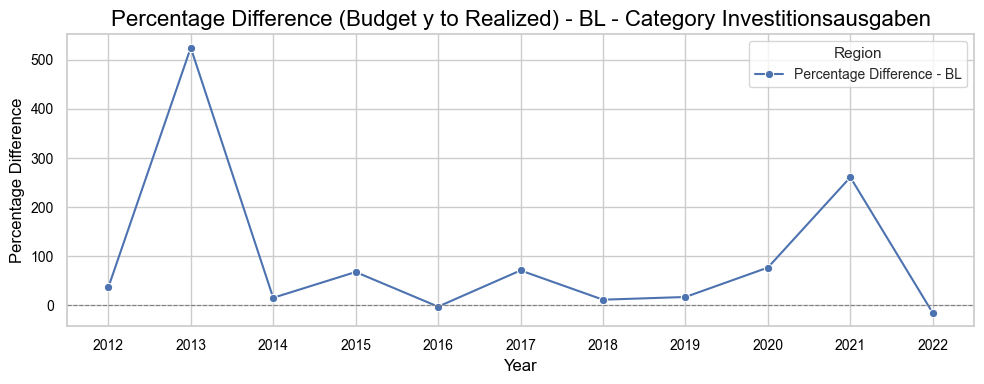

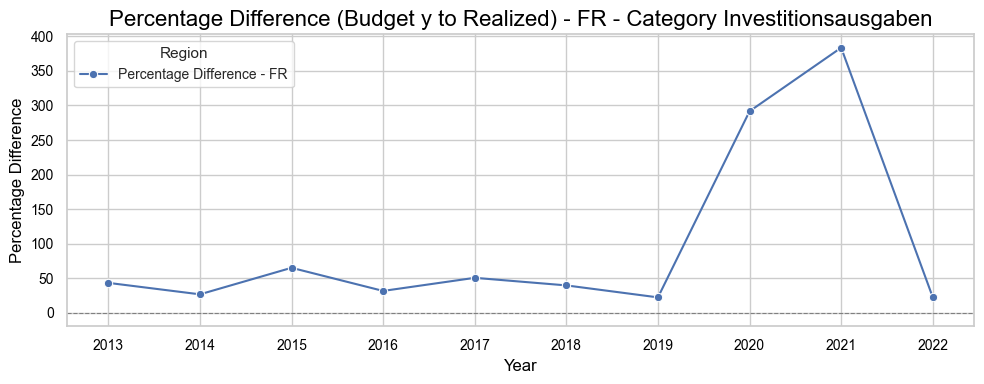

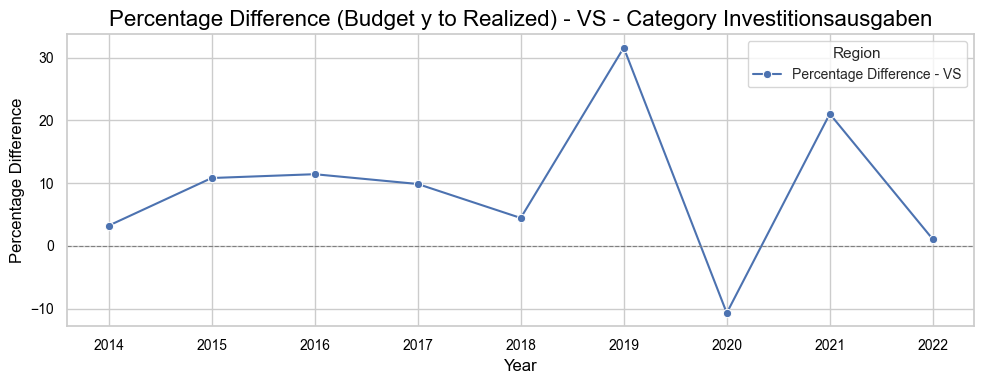

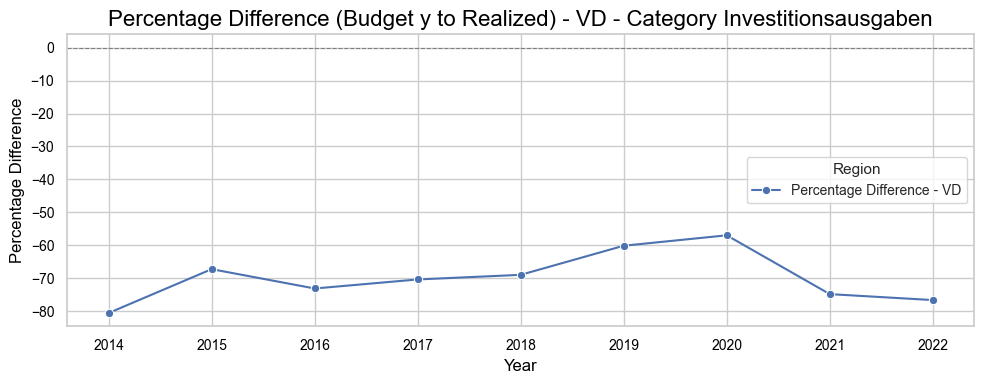

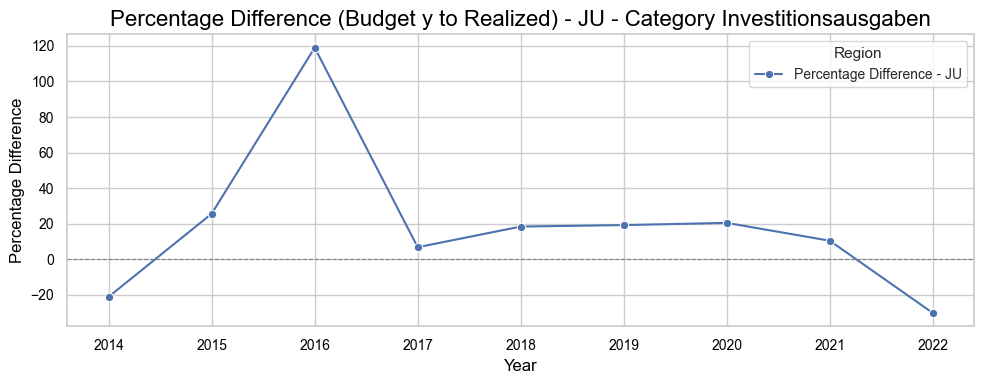

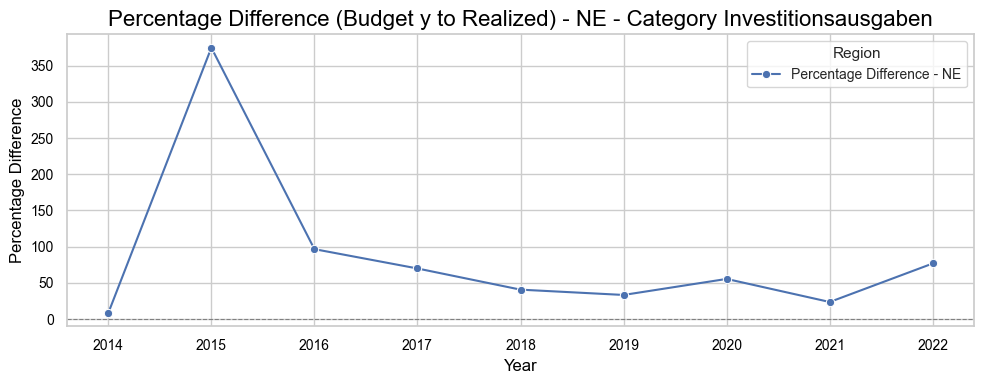

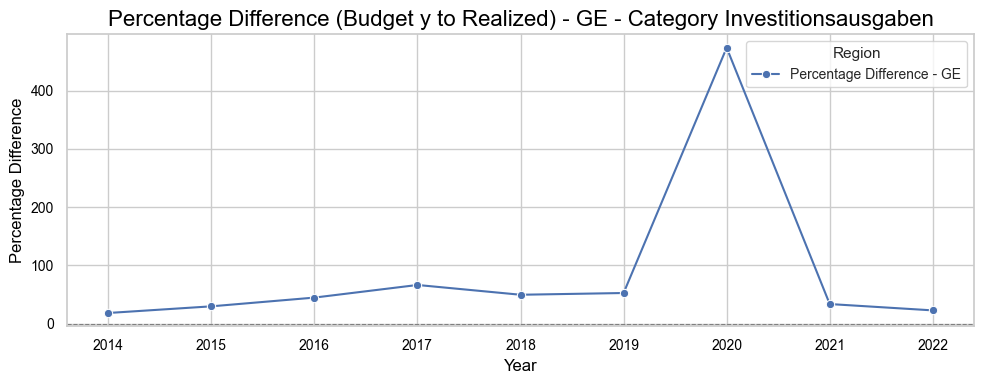

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

output_dir = 'time_series_additional_plots'
os.makedirs(output_dir, exist_ok=True)

plt.style.use('default')

sns.set(style="whitegrid")  # Use a similar style to your other plots

regions = df['Region'].unique()

for region in regions:
    region_data = df[df['Region'] == region].groupby('Year')['Percentage Difference'].mean().reset_index()
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=region_data, x='Year', y='Percentage Difference', marker='o', linestyle='-', label=f'Percentage Difference - {region}')
    plt.title(f'Percentage Difference (Budget y to Realized) - {region} - Category {CATEGORY}', fontsize=16, color='black')
    plt.xlabel('Year', fontsize=12, color='black')
    plt.ylabel('Percentage Difference', fontsize=12, color='black')
    plt.axhline(0, color='grey', lw=0.8, ls='--')  # Add a line at 0% difference for reference
    plt.legend(title='Region', fontsize=10, title_fontsize='11', loc='best')
    plt.yticks(fontsize=10, color='black')
    
    # Set x-ticks to show every year and format as integers
    years = region_data['Year'].unique()
    plt.xticks(ticks=years, labels=[int(year) for year in years], fontsize=10, color='black')
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"{output_dir}/percentage_difference_{region}_{CATEGORY}.png", bbox_inches='tight')
    plt.show()
